### 설문 데이터를 탐색해 보자 
* 각 Feature의 분포를 탐색해보고 
* Clustering된 Feature에 대하여 생각해 보기

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams["font.family"] = 'AppleGothic'

pd.options.display.max_rows = 10
%matplotlib inline

### 데이터 로드 

In [20]:
dataset_path = './resource/class-survey-sample.csv'

survey_ds = pd.read_csv(dataset_path)
survey_ds.head()

,타임스탬프,닉네임,직업,성별,나이,복장,상의옷색상,하의옷색상,하의옷종류,신발색상,신발종류,사는곳,전공,실습환경OS
0,2017. 10. 16 오전 5:57:16,닉1,대학생,남,20,평상복,흰색,흰색,청바지,흰색,구두,강남,컴공,맥OS
1,2017. 10. 16 오전 5:57:16,닉2,대학생,남,20,평상복,흰색,흰색,청바지,흰색,구두,강남,컴공,맥OS
2,2017. 10. 16 오전 5:57:16,닉3,대학생,남,20,평상복,흰색,노랑,청바지,흰색,구두,강남,컴공,맥OS
3,2017. 10. 16 오전 5:57:16,닉4,대학생,남,20,평상복,흰색,노랑,청바지,흰색,구두,강남,컴공,맥OS
4,2017. 10. 16 오전 5:57:16,닉5,대학생,남,20,평상복,흰색,흰색,청바지,흰색,구두,강남,컴공,맥OS


### 데이터 클렌징 

In [21]:
### 

### 분포 탐색해보기  

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10c9790f0>], dtype=object)

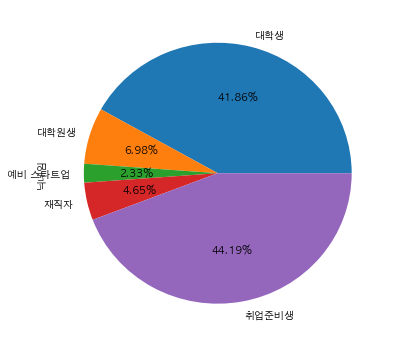

In [19]:
survey_ds.groupby('직업')\
         .count()[['닉네임']]\
         .plot.pie(subplots=True, figsize=(6,6), autopct="%.2f%%", legend=None)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10bb24940>], dtype=object)

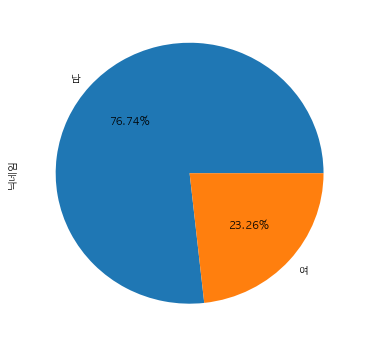

In [22]:
survey_ds.groupby('성별')\
         .count()[['닉네임']]\
         .plot.pie(subplots=True, figsize=(6,6), autopct="%.2f%%", legend=None)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10ac73470>], dtype=object)

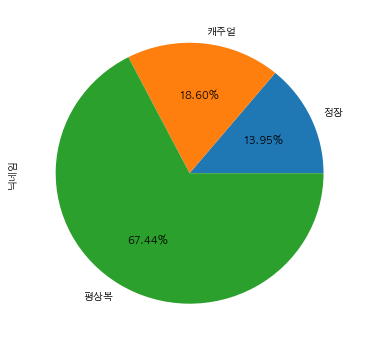

In [23]:
survey_ds.groupby('복장')\
         .count()[['닉네임']]\
         .plot.bar(subplots=True, figsize=(6,6), autopct="%.2f%%", legend=None)

In [36]:
color_ds = survey_ds.groupby(['상의옷색상','하의옷색상']).count()[['닉네임']].reset_index()

color_ds.pivot('상의옷색상', '하의옷색상', '닉네임')\
        .fillna(0)\
        .plot.bar(figsize=(10,5))

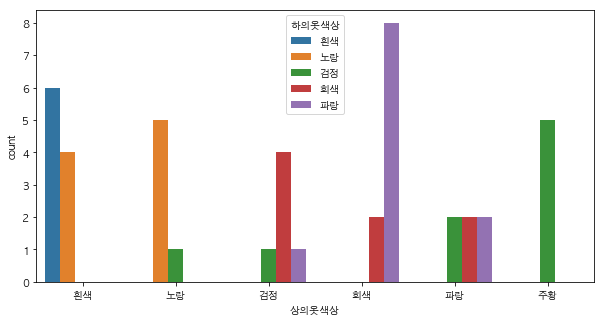

In [56]:
plt.figure(figsize=(10,5))
sns.countplot(x="상의옷색상", hue='하의옷색상', data=survey_ds )

In [63]:
### clustering 

In [65]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from collections import defaultdict
# label encoding 
le_enc_dict = defaultdict(LabelEncoder)
le_survey_ds = survey_ds.apply(lambda x:le_enc_dict[x.name].fit_transform(x))

In [77]:
le_survey_ds

,타임스탬프,닉네임,직업,성별,나이,복장,상의옷색상,하의옷색상,하의옷종류,신발색상,신발종류,사는곳,전공,실습환경OS
0,0,0,0,0,0,2,5,4,2,3,0,0,3,0
1,0,11,0,0,0,2,5,4,2,3,0,0,3,0
2,0,22,0,0,0,2,5,1,2,3,0,0,3,0
3,0,33,0,0,0,2,5,1,2,3,0,0,3,0
4,0,38,0,0,0,2,5,4,2,3,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,0,32,4,0,4,0,2,0,2,0,3,6,5,1
39,0,34,4,0,4,0,2,0,2,2,3,5,1,1
40,0,35,4,0,4,0,2,0,2,2,3,5,1,1
41,0,36,4,0,4,0,2,0,2,0,3,7,1,1


In [78]:
le_survey_ds.drop(['닉네임','타임스탬프'], axis=1, inplace=True)

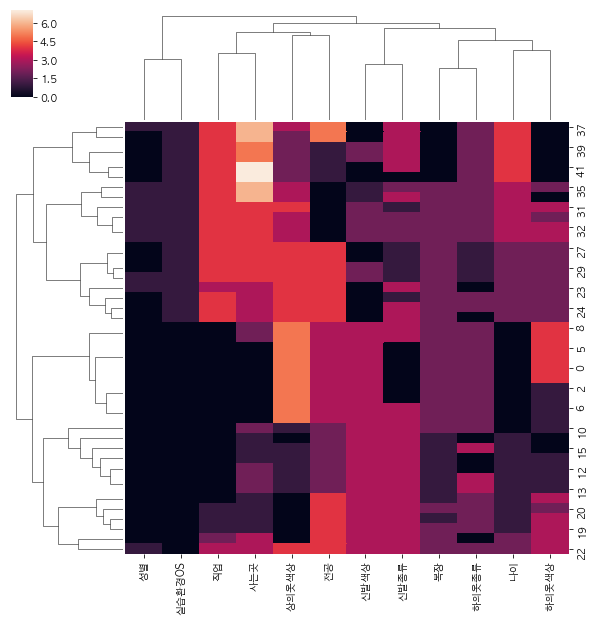

In [79]:
sns.clustermap(le_survey_ds, metric='jaccard')

In [80]:
### Stop & Think해보기 